<a href="https://colab.research.google.com/github/you-sif/you-sif/blob/main/ExploreDataBuildSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

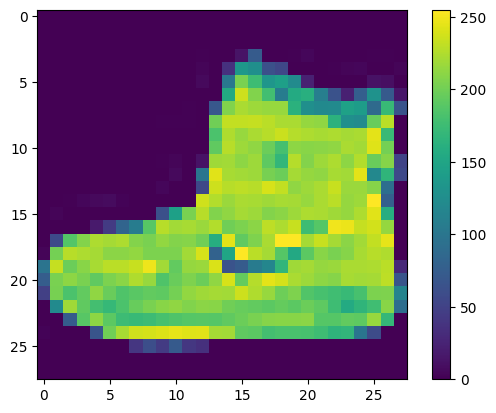

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model.
#To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:
train_images = train_images / 255.0

test_images = test_images / 255.0

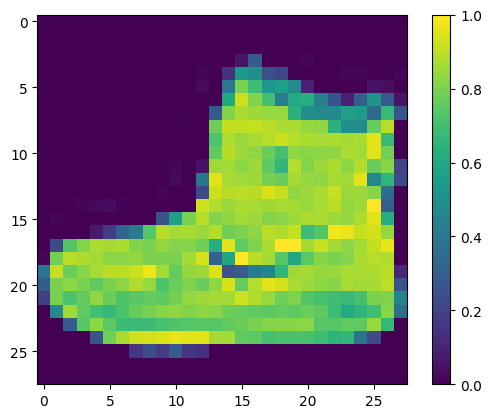

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

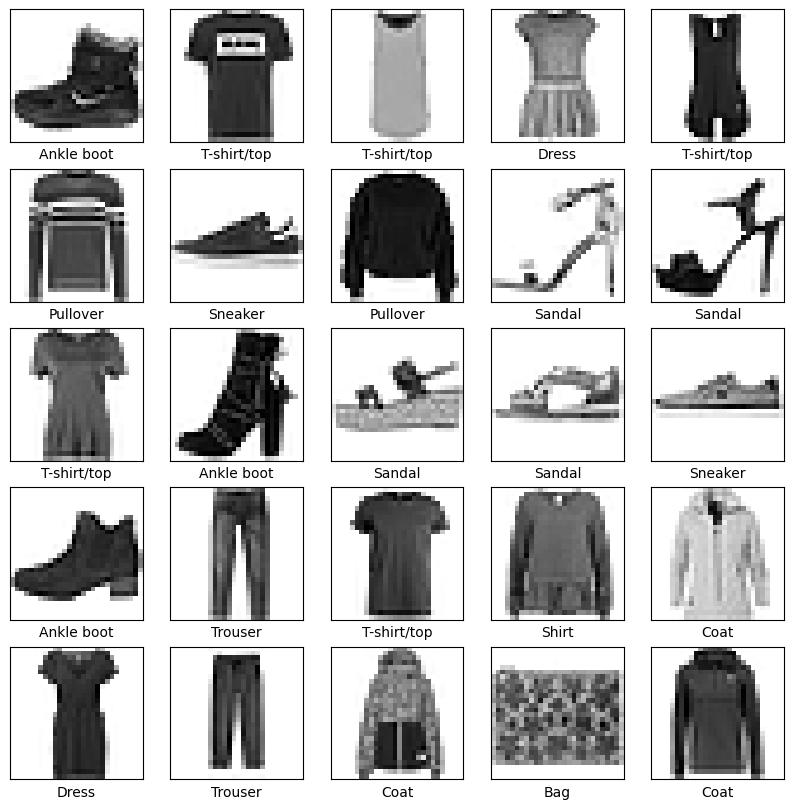

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
#Build a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
#Feed the mode
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5008 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3736 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3390 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3130 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2949 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2807 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2673 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2570 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2490 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [17]:
#Next, compare how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3317 - accuracy: 0.8842 - 638ms/epoch - 2ms/step

Test accuracy: 0.8841999769210815


In [18]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
predictions[0]

array([5.0498656e-08, 6.8606321e-09, 7.0743532e-08, 2.7199630e-07,
       1.8758662e-07, 2.6084008e-03, 8.2119402e-07, 1.3426596e-02,
       2.7304733e-07, 9.8396331e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

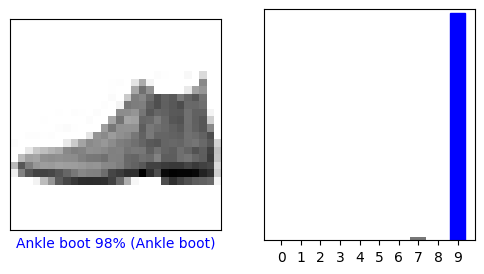

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

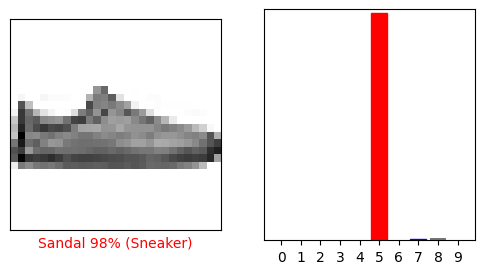

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

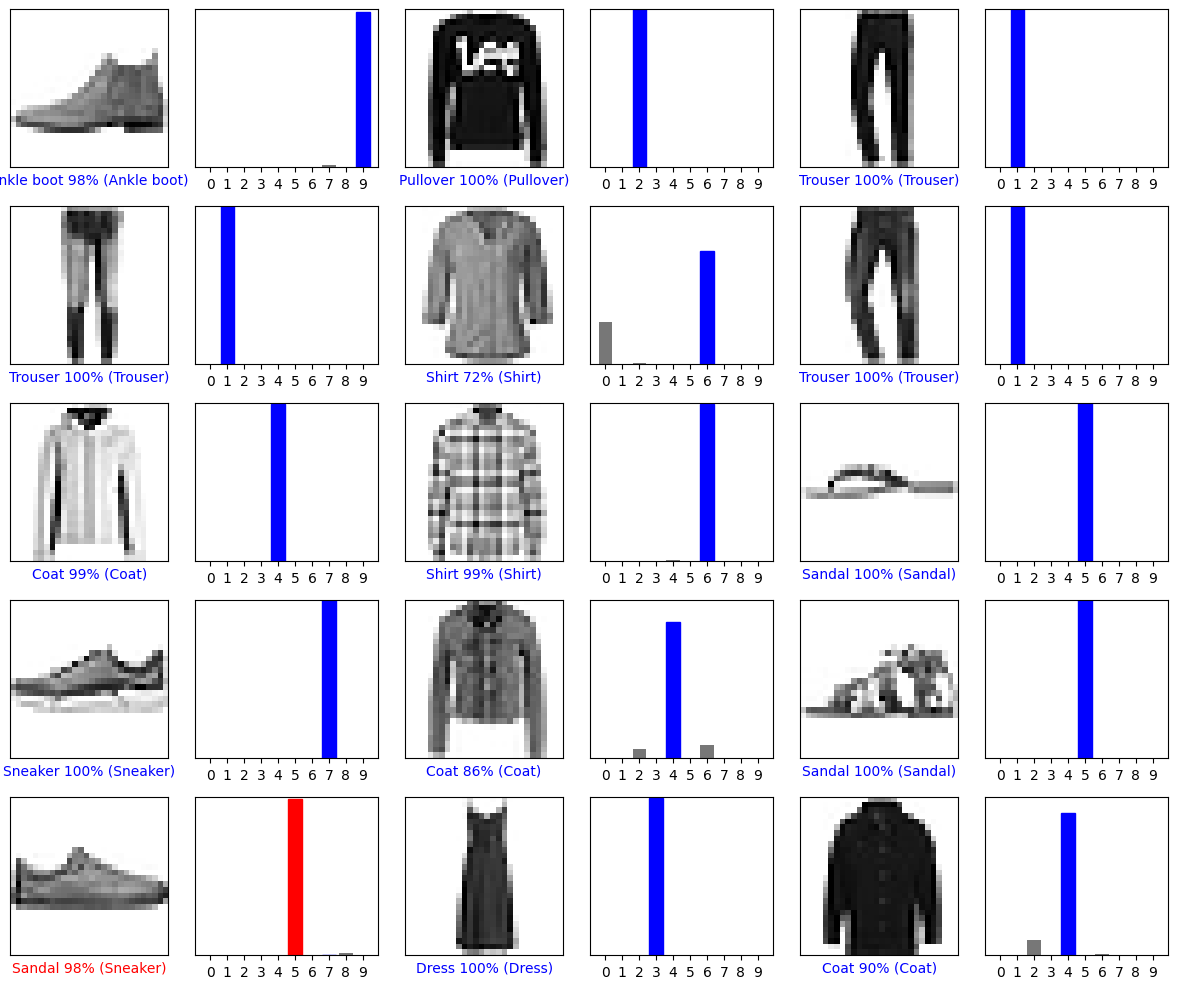

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
#train_X imaes and train_y is labels
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
print("Features: ", train_images)
print("Labels: ", train_labels)

Features:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Labels:  [5 0 4 ... 5 6 8]


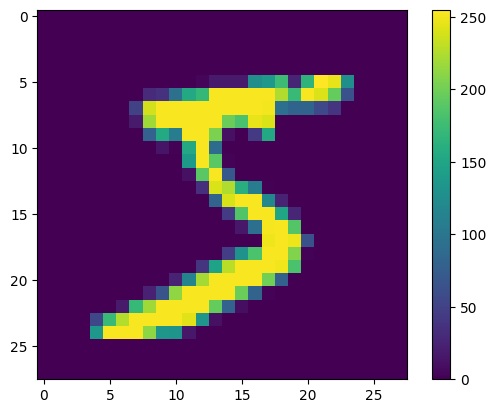

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = train_labels / 255.0
test_labels = test_labels / 255.0

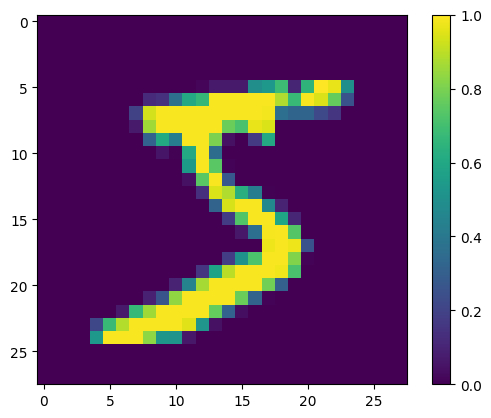

In [31]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
class_names = ['zero','one','two','three','four','five','six','seven','nine','ten']

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Sample label: 5


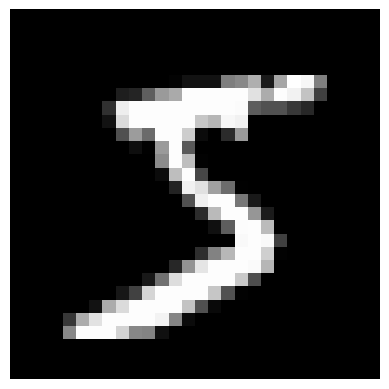

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the training data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

# Print the shape of the test data
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Print a sample image and its label
sample_index = 0
sample_image = x_train[sample_index]
sample_label = y_train[sample_index]
print("Sample label:", sample_label)
plt.imshow(sample_image, cmap='gray')
plt.axis('off')
plt.show()

In [50]:
import numpy as np
from tensorflow.keras.datasets import mnist

#upload the minist data from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#flatten the images from 2Dim to 1Dim
x_train_flatten = x_train.reshape(-1, 28 * 28)
x_test_flatten = x_test.reshape(-1, 28 * 28)

#Normalize pixel values to the range from zero to one
x_train_normalized = x_train_flatten.astype('float32') / 255.0
x_test_normalized = x_test_flatten.astype('float32') / 255.0

In [51]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train_normalized, y_train)

SVC()

In [52]:
from sklearn.metrics import accuracy_score

# Predict labels on the test data
y_pred = svm_classifier.predict(x_test_normalized)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9792
